# Figure 2 (main text)

In [1]:
cd '/Users/starr/My Drive/Files/Projects/U1475/subproject_repos/SS_Paper/Starr_etal_ACC'

/Users/starr/My Drive/Files/Projects/U1475/subproject_repos/SS_Paper/Starr_etal_ACC


In [2]:
# preamble
import pandas as pd
import numpy as np
import matplotlib as mpl

from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy import signal,stats
from scipy.interpolate import interp1d


mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.size'] = 10
mpl.rcParams["mathtext.fontset"] = "dejavusans"

plt.style.use('default')

mis_bounds = pd.read_csv('data/misc/LR04_MISboundaries.txt')
# remove sub-stages from table\n",
mis_bounds.drop([4,5,6,7,8],inplace=True)
mis_bounds.iloc[-1] = {'MIS':'0/1','Age(ka)':0}
mis_bounds.sort_values('Age(ka)',inplace=True)
mis_bounds.reset_index(drop=True,inplace=True)

### define age_model function
def age_model(depth_in,ties):
    f = interp1d(ties.iloc[:,0],ties.iloc[:,1],fill_value='extrapolate')
    age = f(depth_in)
    return age

In [3]:
def filtered(x,y,highcut,tnew = [0,0]):
    """ Interpolate to linear scale and apply low-pass butterworth filter
    
   
    returns:
    x_lin -- the linear scale for the desired record
    r_filt -- the filtered RGB red record
    r_lin -- the linearly inteprolated RGB red record
    """
    fs = np.mean(np.diff(x))

    if len(tnew)>2:
        x_lin = tnew
    else:
        minx = np.min(x)+1
        maxx = np.max(x)-1
        x_lin = np.arange(minx,maxx,fs)
    f = interp1d(x,y,fill_value='extrapolate')
    y_lin = f(x_lin)
    y_filt = butter_lowpass_filter(y_lin, highcut, 1/fs, order=5)
    return x_lin, y_filt, y_lin

def butter_lowpass(highcut, fs, order=5):
    nyq = 0.5 * fs
    high = highcut/nyq
    b, a = signal.butter(order, high, btype='low',analog=False)
    return b, a

def butter_lowpass_filter(data, highcut, fs = 0.5, order=6):
    b, a = butter_lowpass(highcut, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y



lpf = 1/4


In [4]:
# load data
## ---- APcomp! ---- ##
apcomp = pd.read_csv('tables/ap_comp_ss.csv')

##### external data #####
## ---- MD02-2589 ---- ##
md022589_ss = pd.read_csv('tables/md02_2589_ss.csv')

## ---- ODP1123 ---- ##
odp1123_ss = pd.read_csv('tables/odp1123_ss.csv')

## ---- ODP 1090 alkenone data from Martinez-Garcia et al., 2010
odp1090_sst = pd.read_excel('data/external_data.xlsx',sheet_name='ODP1090_SST',header=7)

## ---- Drake Passage records ---- ##
ps97_ss = pd.read_csv('tables/ps97_ss.csv')
ps97_085 = pd.read_csv('tables/ps97_085_ss.csv')

## ---- ODP 1094 Ba/Fe ---- ##
bafe = pd.read_excel('data/external_data.xlsx',sheet_name='ODP1094_BaFe',header=8)

## ---- Ice core source-site temp ---- ##
domefuji = pd.read_excel('data/external_data.xlsx',sheet_name='Dome_Fuji_iso',header=13)
domefuji['Age'] = domefuji['Age']/1000

## ---- Prob Stack ---- ##

prob = pd.read_excel('data/external_data.xlsx',sheet_name='Prob_Stack',header=9)

## ---- Ai ACC ---- ##
ai = pd.read_excel('data/external_data.xlsx',sheet_name='Ai_ACC',header=0)

## ---- U1540 / U1541 ---- ##
u1540 = pd.read_csv('tables/u1540_ss.csv')
u1541 = pd.read_csv('tables/u1541_ss.csv')

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:122: SyntaxWarning: invalid escape sequence '\m'
<>:124: SyntaxWarning: invalid escape sequence '\m'
<>:125: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:122: SyntaxWarning: invalid escape sequence '\m'
<>:124: SyntaxWarning: invalid escape sequence '\m'
<>:125: SyntaxWarning: invalid escape sequence '\m'
/var/folders/c_/cgbnj8n943z0v0kv5qjmw2s00000gn/T/ipykernel_41289/242615647.py:19: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_ylabel('$\mathrm{\delta^{18}O_{benthic}\ (^o/_{oo})}$')
/var/folders/c_/cgbnj8n943z0v0kv5qjmw2s00000gn/T/ipykernel_41289/242615647.py:122: SyntaxWarning: invalid escape sequence '\m'
  a.set_ylabel('$\mathrm{\Delta U\ (cm/s)}$')
/var/folders/c_/cgbnj8n943z0v0kv5qjmw2s00000gn/T/ipykernel_41289/242615647.py:124: SyntaxWarning: invalid escape sequence '\m'
  ax[5].set_ylabel('$\mathrm{\Delta T_{site-source}\ (^oC)}$')
/var/folders/c_/cgbnj8n943z0v

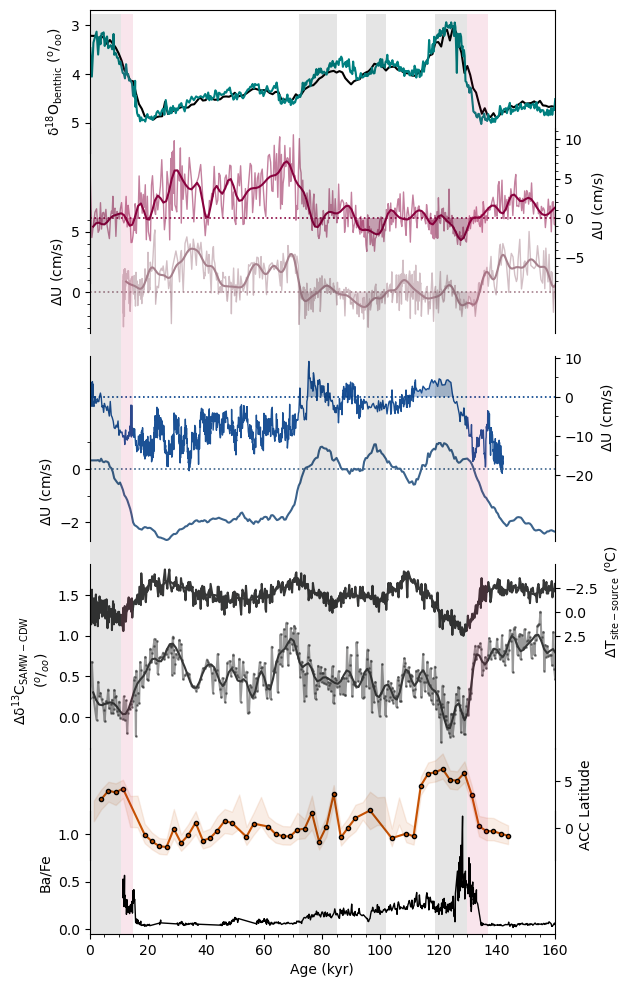

In [22]:
mpl.rcParams['font.size'] = 10

f,ax = plt.subplots(9,1,sharex=True,figsize=(6,9),gridspec_kw={'height_ratios':[1.2,1.2,1,1,1,1,1,1,1]})

#### FORMAT ####
lpf = 1/5
    
### PLOT ###
c2 = '#023e8a'
c3 = 'xkcd:denim'
c1 = '#89023e'
c4 = '#a6808c'

### stratigraphy
ax[0].plot(prob['Age [kyr]'],prob['d18O_stack'],label='Prob-Stack',color='k',lw=1.5)
n =apcomp['Cwu d18O (VPDB)'].notnull()
ax[0].plot(apcomp['LR04_age'][n],apcomp['Cwu d18O (VPDB)'][n]+0.43,label='APcomp',color='teal',lw=1.5)
ax[0].invert_yaxis()
ax[0].set_ylabel('$\mathrm{\delta^{18}O_{benthic}\ (^o/_{oo})}$')


#### apcomp
n = apcomp['dU_dhol_mccave'].notnull()
ax[1].plot(apcomp['LR04_age'][n],apcomp['dU_dhol_mccave'][n],color=c1,alpha=0.5,lw=1)
t,y,pp = filtered(apcomp['LR04_age'][n],apcomp['dU_dhol_mccave'][n],lpf)
y0 = y.copy()
y0[y0>0]=0
ax[1].fill_between(t,y0,0,alpha=0.3,ec='none',fc=c1)
ax[1].plot(t,y,color=c1)
ax[1].axhline(0,color=c1,linestyle=':',lw=1.2)


## 2589
n = md022589_ss['dU_dhol_mccave'].notnull()
t = md022589_ss['Age [kyr]'][n]
y = md022589_ss['dU_dhol_mccave'][n]
n = t.notnull()
t=t[n]
y=y[n]
#ax[1].plot(t,y,color='xkcd:dusty purple',lw=1,alpha=0.5)
ax[2].plot(t,y,color=c4,alpha=0.5,lw=1)
y0 = y.copy()
y0[y0>0]=0
ax[2].fill_between(t,y0,0,alpha=0.3,ec='none',fc=c4)
t,y,pp = filtered(t,y,lpf)
ax[2].plot(t,y,color=c4)
ax[2].axhline(0,color=c4,linestyle=':',lw=1.2)


#### PS97
# n = ps97_085['dU_dhol_mccave'].notnull()
# t = ps97_085['Age [ka BP]'][n]
# y = ps97_085['dU_dhol_mccave'][n]
# ax[1].plot(t,y,color=c2,lw=1,alpha=0.5)
# t,y,pp = filtered(t,y,lpf)
# y0 = y.copy()
# y0[y0>0]=0
# ax[1].fill_between(t,y0,0,alpha=0.25,ec='none',fc=c2)
# ax[1].plot(t,y,color=c2)

n = ps97_085['dU_dhol_wu_SSFS'].notnull()
t = ps97_085['Age [ka BP]'][n]
y = ps97_085['dU_dhol_wu_SSFS'][n]
ax[3].plot(t,y,color=c2,lw=1,alpha=0.9)
# t,y,pp = filtered(t,y,lpf)
y0 = y.copy()
y0[y0<0]=0
ax[3].fill_between(t,y0,0,alpha=0.3,ec='none',fc=c2)
#ax[3].plot(t,y,color=c2)
ax[3].axhline(0,color=c2,linestyle=':',lw=1.2)

# ax3 = ax[3].twinx()
# ax3.plot(ps97_085['Age [ka BP]'],ps97_085['SS [µm] (Plus fine sand (mean))'])
# ax3.axis('off')


## ax[3]
n = u1541['dU_dhol_mccave'].notnull()
y = u1541['dU_dhol_mccave'][n]
t = u1541['Age [ka BP]'][n]
ax[4].plot(t,y,color=c3,marker='o',ms=0)
# t,y,pp = filtered(t,y,lpf)
# y0 = y.copy()
# y0[y0>0]=0
# ax[4].plot(t,y,color=c3)
ax[4].axhline(0,color=c3,lw=1.2,linestyle=':')


## fujitemp
x = domefuji['Age']
y = domefuji['T_site']-domefuji['T_source']
n = y.notnull()
x=x[n]
y=y[n]
ax[5].plot(x,y,color='xkcd:dark grey')
t,y,pp = filtered(x,y,lpf)
ax[5].plot(t,y,lw=1.5,color='xkcd:dark grey')
ax[5].invert_yaxis()

### Dd13C
y = apcomp['Gtrunc d13C (VPDB)'] - apcomp['Cwu d13C (VPDB)'] 
x = apcomp['LR04_age']
n = y.notnull()
x=x[n]
y=y[n]
ax[6].plot(x,y,marker='o',ms=1,color='xkcd:dark grey',alpha=0.5)

t,y,pp = filtered(x,y,lpf)
ax[6].plot(t,y,lw=1.5,color='xkcd:dark grey')

### Ai ACC reconstruction
n = ai['reconstructed ACC latitude (degrees poleward than modern)'].notnull()
ax[7].fill_between(ai['Age (ka)'],ai['reconstructed ACC latitude lower (degrees poleward than modern)'],ai['reconstructed ACC latitude upper (degrees poleward than modern)'],color='xkcd:dark orange',alpha=0.1)
ax[7].plot(ai['Age (ka)'][n],ai['reconstructed ACC latitude (degrees poleward than modern)'][n],marker='o',color='xkcd:dark orange',markeredgecolor='k',ms=3)


### 1094 Ba/Fe
ax[8].plot(bafe['Age [kyr]'],bafe['ba/fe'],color='k',lw=1)

# ## labels 1
for a in ax[1:5]:
    a.set_ylabel('$\mathrm{\Delta U\ (cm/s)}$')

ax[5].set_ylabel('$\mathrm{\Delta T_{site-source}\ (^oC)}$')
ax[6].set_ylabel('$\mathrm{\Delta\delta^{13}C_{SAMW-CDW}}$\n$(^o/_{oo})$')
ax[7].set_ylabel('ACC Latitude')
ax[8].set_ylabel('Ba/Fe')


plt.subplots_adjust(hspace=-0.01)
for a in ax:
    a.patch.set_visible(False)
    if a != ax[0]:
        a.spines['top'].set_visible(False)
    if a != ax[-1]:
        a.spines['bottom'].set_visible(False)
        a.xaxis.set_ticks_position('none')
        
    
for a in ax[1::2]:
    a.yaxis.set_ticks_position('right')
    a.yaxis.set_label_position('right')
    a.spines['left'].set_visible(True)
for a in ax[::2]:
    a.spines['right'].set_visible(True)
ax[0].xaxis.set_ticks_position('top')

### format ##
ax[0].set_xlim(0,160)

ax[-1].set_xlabel('Age (kyr)')
ax[-1].xaxis.set_minor_locator(MultipleLocator(5))
ax[0].xaxis.set_ticks_position('none')
ax[1].yaxis.set_minor_locator(MultipleLocator(1))
ax[2].yaxis.set_minor_locator(MultipleLocator(1))
ax[3].yaxis.set_minor_locator(MultipleLocator(5))
ax[4].yaxis.set_minor_locator(MultipleLocator(1))


box = ax[0].get_position()
box.y0=box.y0-0.02
ax[0].set_position(box)




box = ax[1].get_position()
box.y0=box.y0-0.03
ax[1].set_position(box)

box = ax[2].get_position()
box.y1=box.y1+0.03
box.y0=box.y0+0.01
ax[2].set_position(box)

box = ax[3].get_position()
box.y1=box.y1-0.01
box.y0=box.y0-0.03
ax[3].set_position(box)

# box = ax[4].get_position()
# box.y1=box.y1+0.01
# box.y0=box.y0+0.01
# ax[4].set_position(box)


box = ax[5].get_position()
box.y1=box.y1-0.02
#box.y0=box.y0-0.01
ax[5].set_position(box)

box = ax[6].get_position()
box.y1=box.y1+0.04
box.y0=box.y0-0.01
ax[6].set_position(box)

box = ax[8].get_position()
box.y1=box.y1+0.02
ax[8].set_position(box)

box = ax[7].get_position()
box.y0=box.y0-0.02
ax[7].set_position(box)
box = ax[7].get_position()
box.y1=box.y1-0.01
ax[7].set_position(box)



ymax = 7.47

ax[-1].axvspan(137,130,clip_on=False,ymax=ymax,alpha=0.1,fc='xkcd:ruby') # TII
ax[-1].axvspan(15,11,clip_on=False,ymax=ymax,alpha=0.1,fc='xkcd:ruby') # T1

ax[-1].axvspan(0,11,clip_on=False,ymax=ymax,alpha=0.1,fc='k') # MIS 1
ax[-1].axvspan(72,85,clip_on=False,ymax=ymax,alpha=0.1,fc='k') # MIS 5.1
ax[-1].axvspan(95,102,clip_on=False,ymax=ymax,alpha=0.1,fc='k') # MIS 5.3
ax[-1].axvspan(119,130,clip_on=False,ymax=ymax,alpha=0.1,fc='k') # MIS 5.5


ax[0].tick_params(labeltop=False)
ax[4].set_ylim(-2.7,1)

f.set_size_inches(6,12)

plt.savefig('figures/F2_draft.pdf',bbox_inches='tight')

In [42]:
ps97_ss

,Unnamed: 0,Depth [m],Age [ka BP],Revised Age (Starr),SS avg [µm],SS_dHolocene,dU_dhol_mccave,dU_dhol_mccave_2std,dU_dhol_wu,pct_dU_dHol_wu,dU_dhol_culp
0,0,0.005,4.16,4.160000,26.22,0.30,0.4080,0.0570,0.2280,1.157407,0.4230
1,1,0.025,5.13,5.128511,25.62,-0.30,-0.4080,-0.0570,-0.2280,-1.157407,-0.4230
2,2,0.065,7.08,7.065532,25.38,-0.54,-0.7344,-0.1026,-0.4104,-2.083333,-0.7614
3,3,0.085,8.06,8.034043,24.96,-0.96,-1.3056,-0.1824,-0.7296,-3.703704,-1.3536
4,4,0.125,10.01,9.971064,25.91,-0.01,-0.0136,-0.0019,-0.0076,-0.038580,-0.0141
...,...,...,...,...,...,...,...,...,...,...,...
3067,3067,16.380,1364.98,1364.980000,22.29,-3.63,-4.9368,-0.6897,-2.7588,-14.004630,-5.1183
3068,3068,16.385,1365.19,1365.190000,22.03,-3.89,-5.2904,-0.7391,-2.9564,-15.007716,-5.4849
3069,3069,16.390,1365.39,1365.390000,22.03,-3.89,-5.2904,-0.7391,-2.9564,-15.007716,-5.4849
3070,3070,16.395,1365.59,1365.590000,22.03,-3.89,-5.2904,-0.7391,-2.9564,-15.007716,-5.4849
